In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Dataset: walmart_stock_price, Train-Test Ratio = 0.7:0.3
Root Mean Squared Error (RMSE): 34.775
Mean Absolute Percentage Error (MAPE): 23.946
Mean Absolute Error (MAE): 31.21


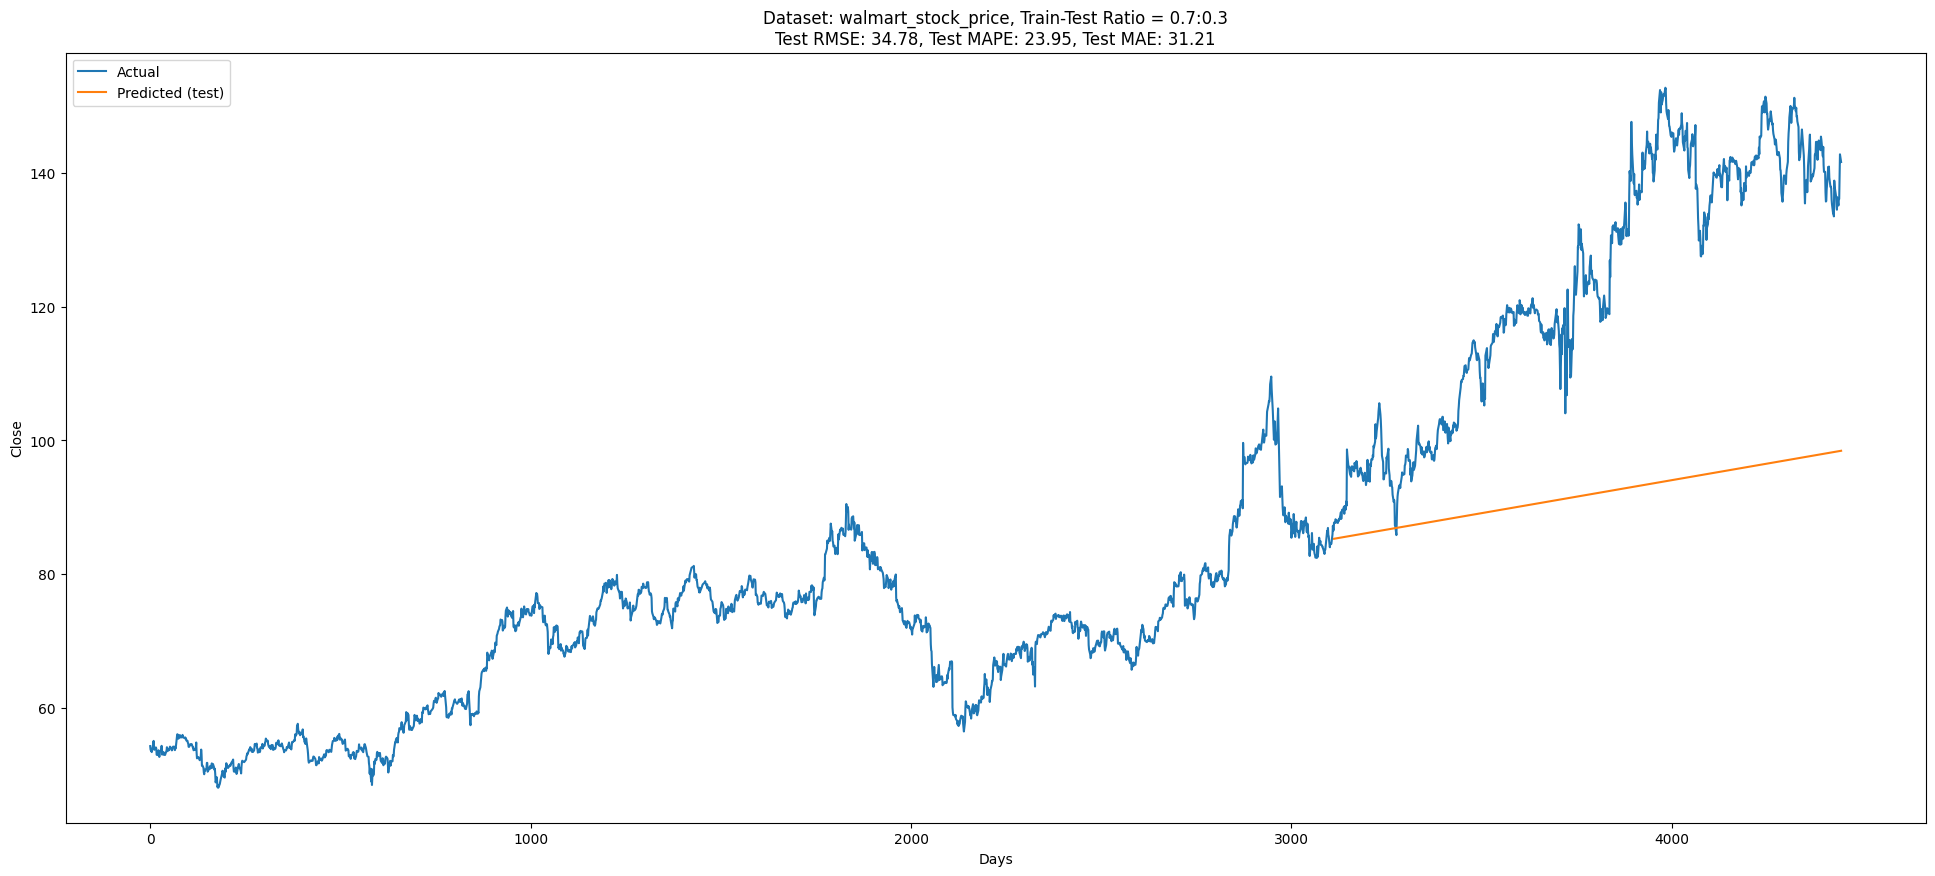



Dataset: walmart_stock_price, Train-Test Ratio = 0.8:0.2
Root Mean Squared Error (RMSE): 34.775
Mean Absolute Percentage Error (MAPE): 23.946
Mean Absolute Error (MAE): 31.21


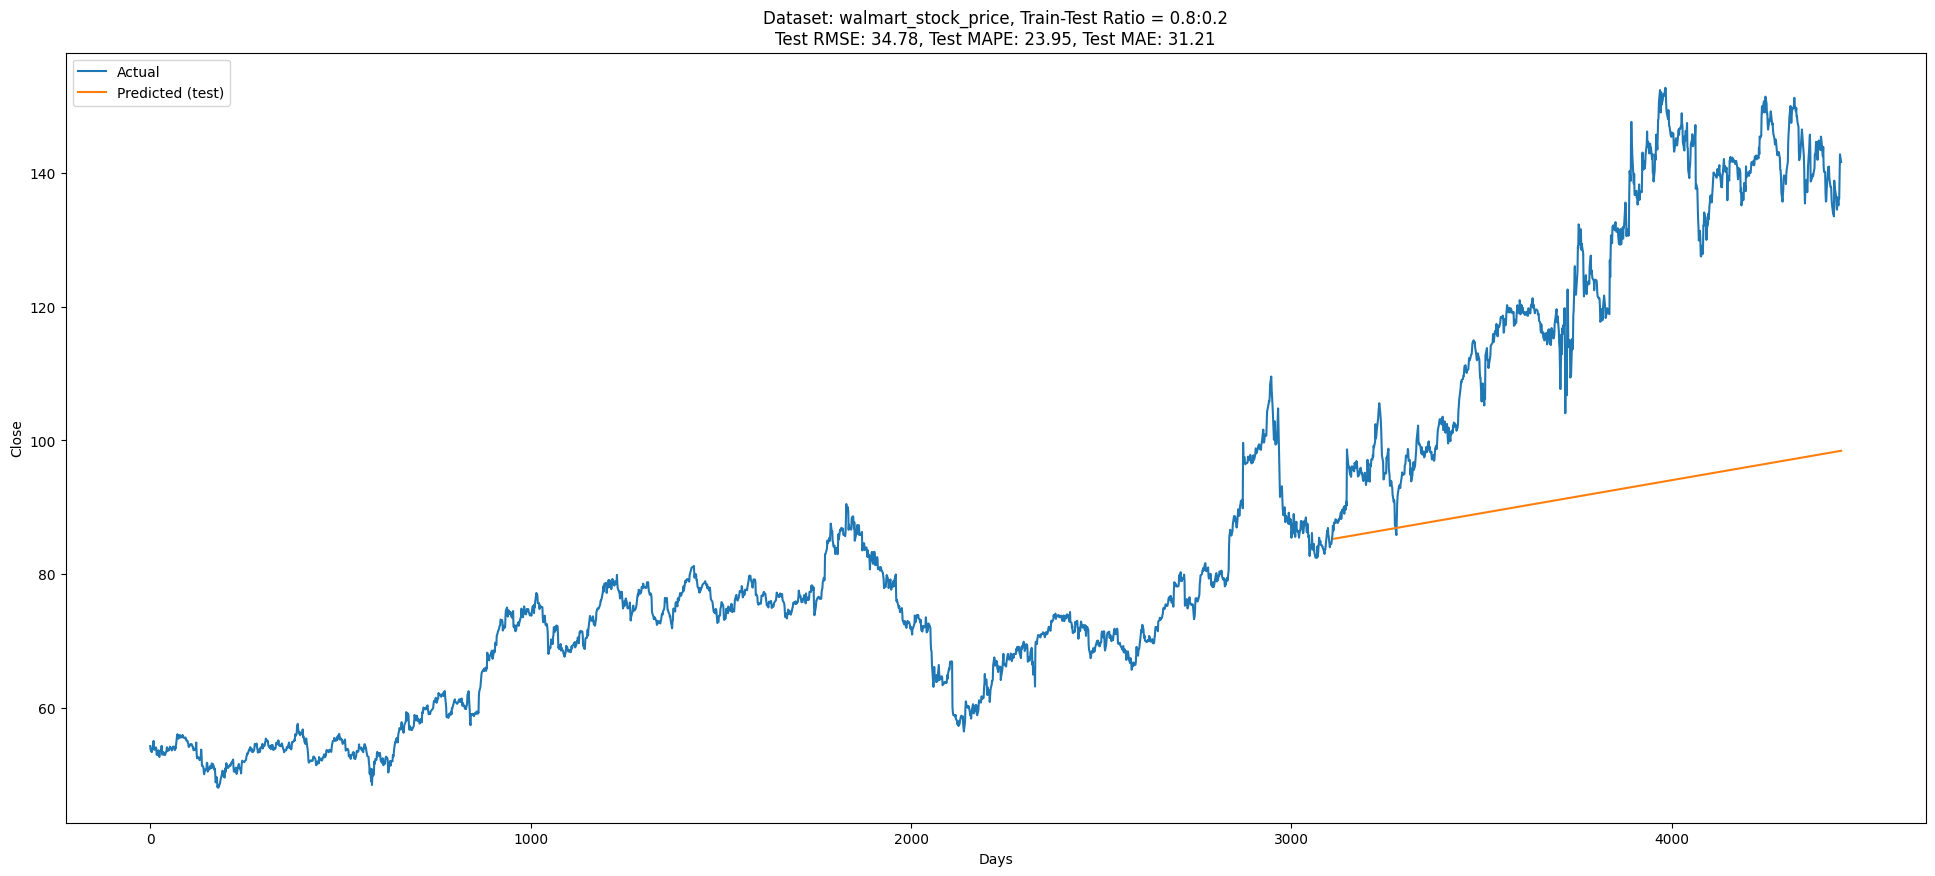



Dataset: walmart_stock_price, Train-Test Ratio = 0.9:0.1
Root Mean Squared Error (RMSE): 34.775
Mean Absolute Percentage Error (MAPE): 23.946
Mean Absolute Error (MAE): 31.21


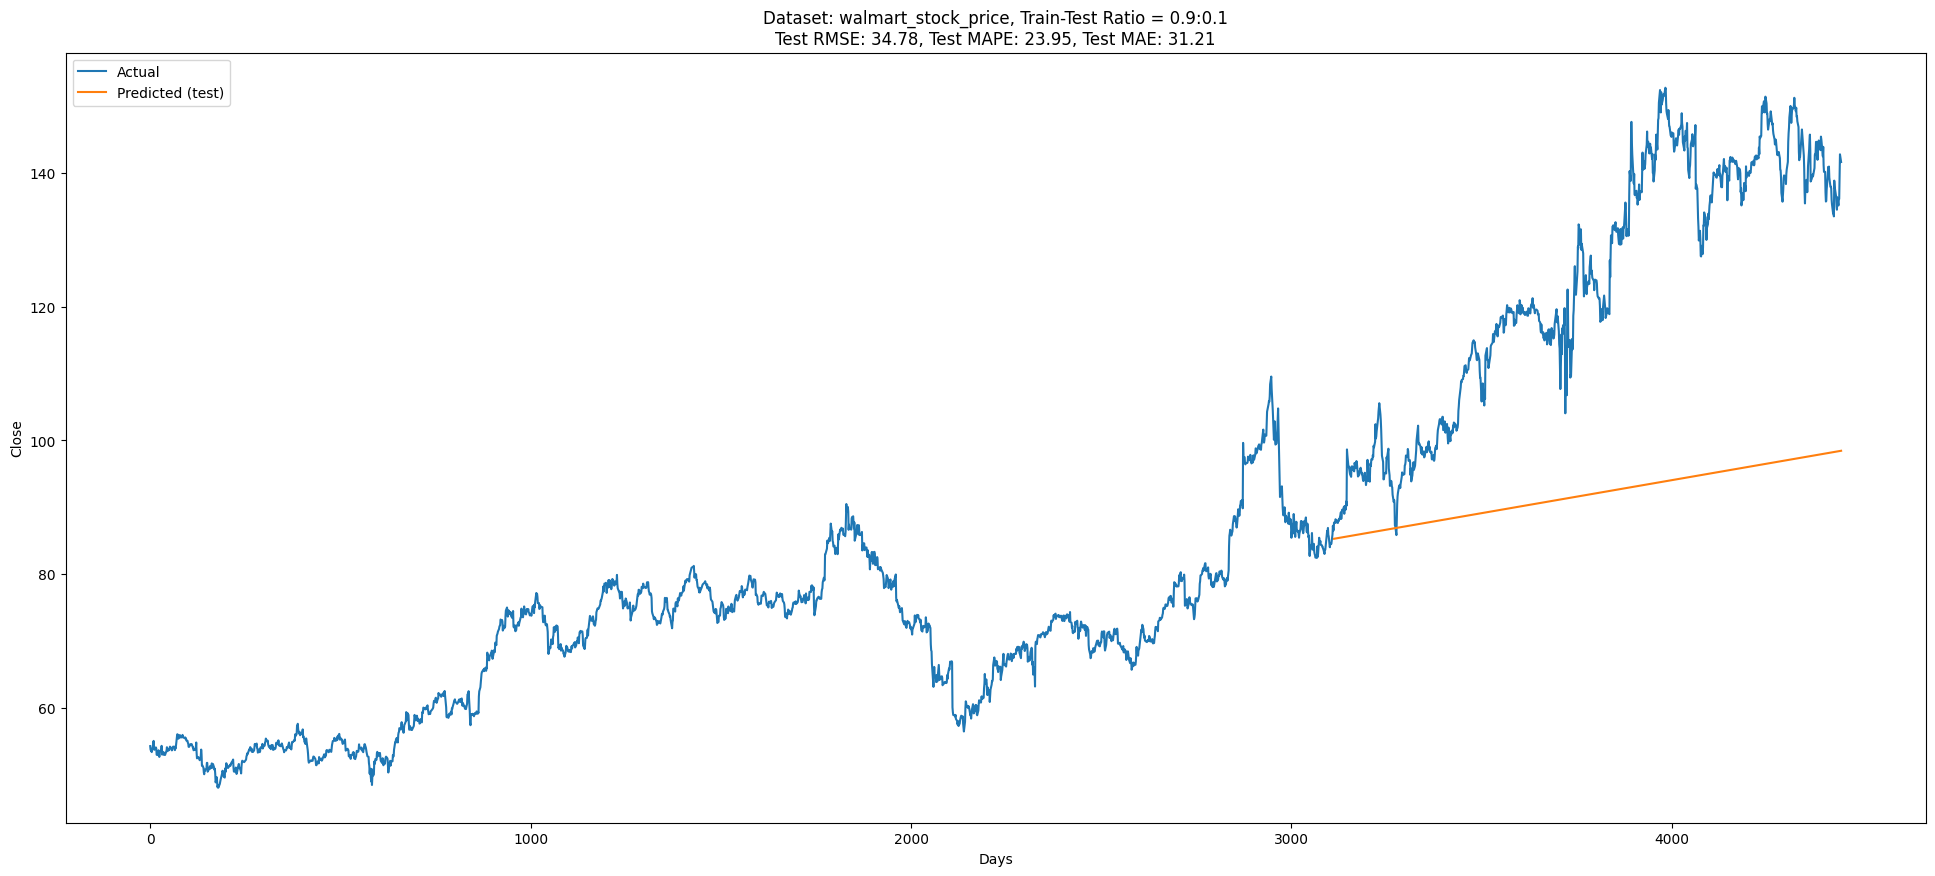



Dataset: facebook_stock_price, Train-Test Ratio = 0.7:0.3
Root Mean Squared Error (RMSE): 53.34
Mean Absolute Percentage Error (MAPE): 15.101
Mean Absolute Error (MAE): 41.899


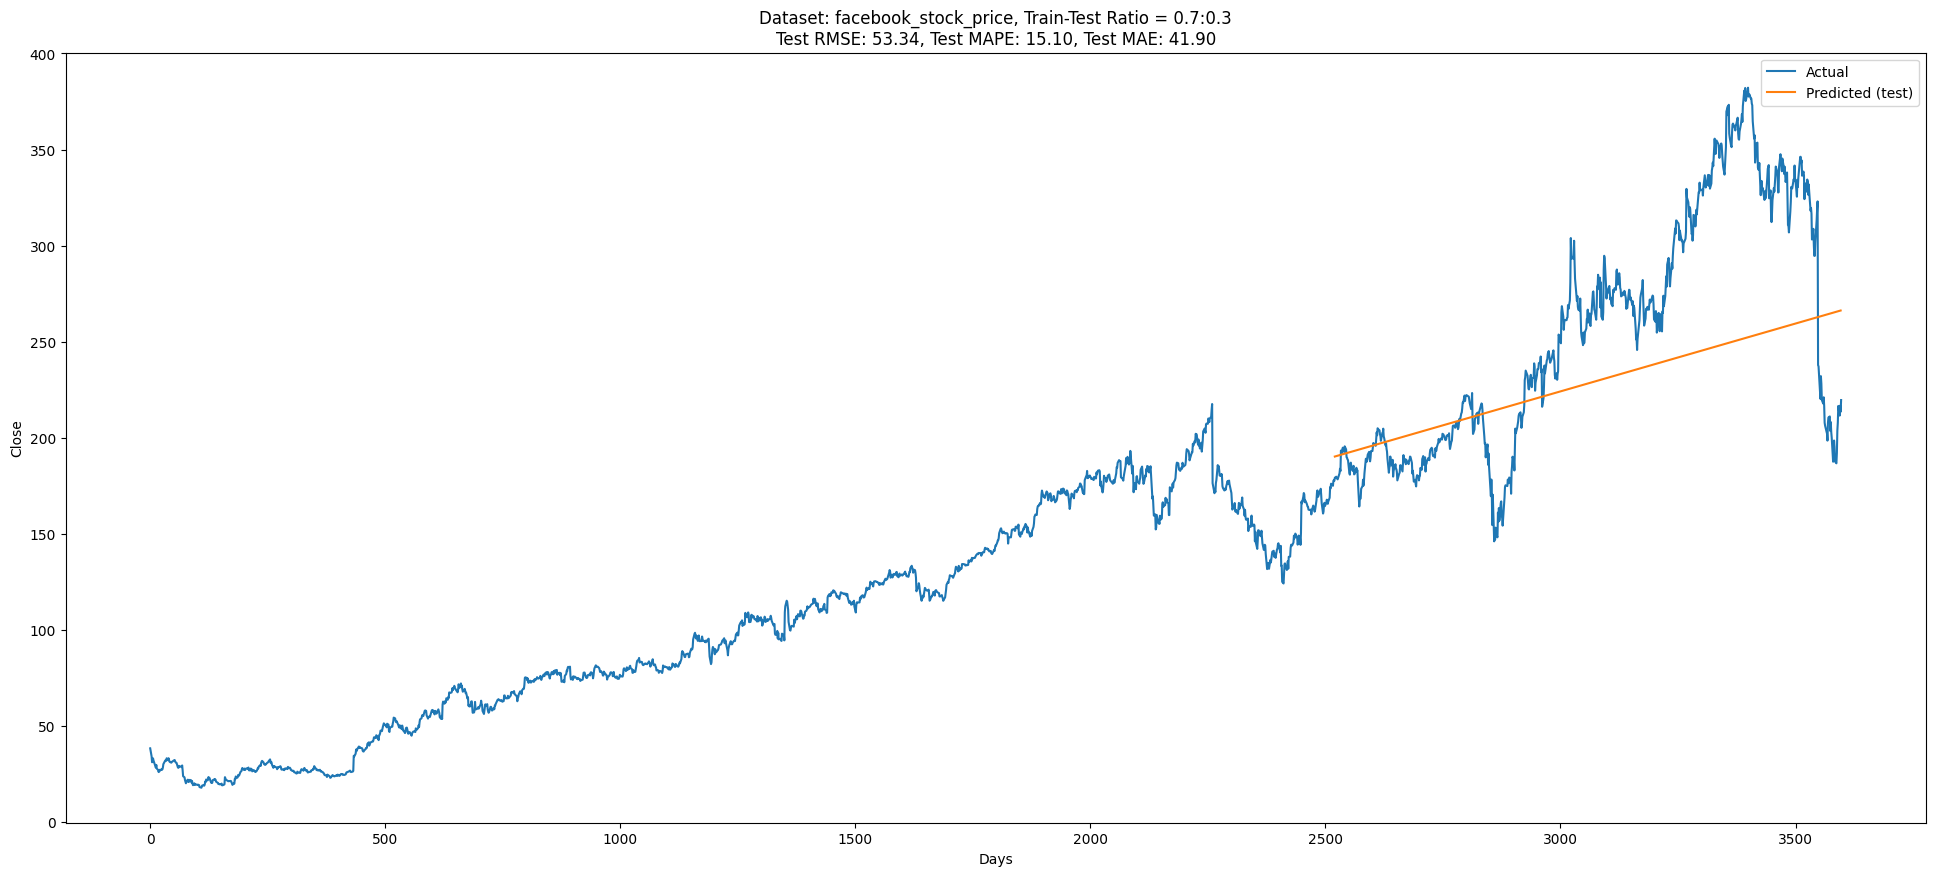



Dataset: facebook_stock_price, Train-Test Ratio = 0.8:0.2
Root Mean Squared Error (RMSE): 53.34
Mean Absolute Percentage Error (MAPE): 15.101
Mean Absolute Error (MAE): 41.899


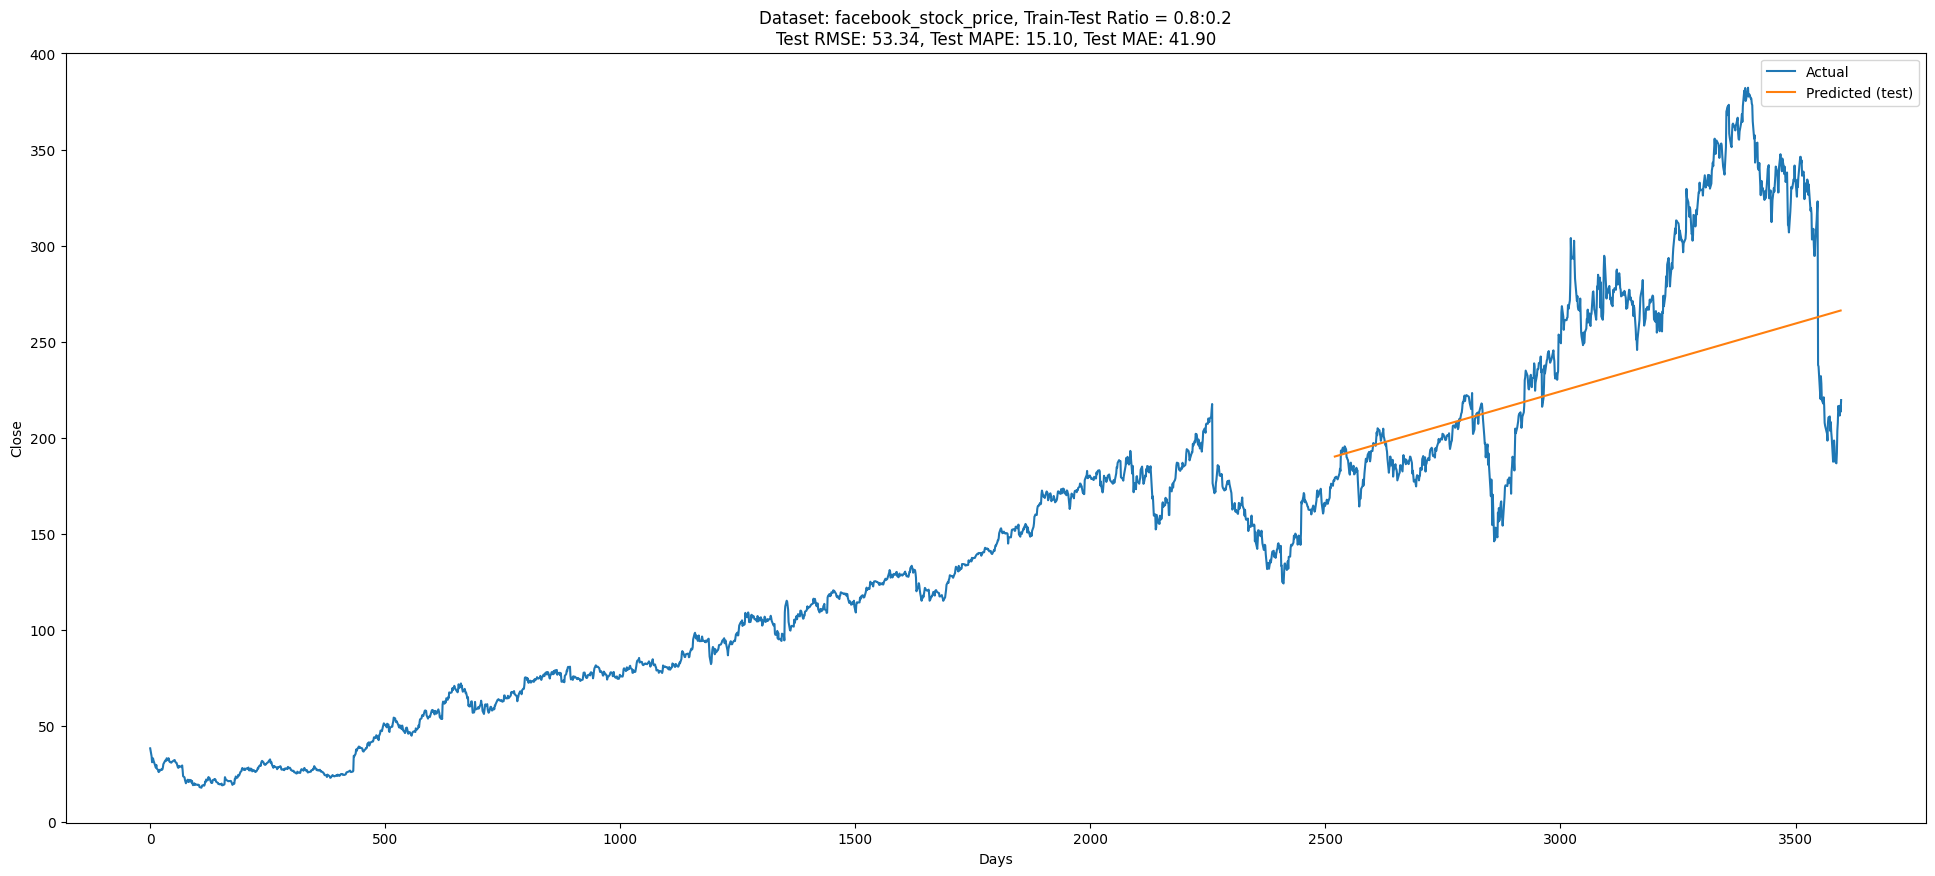



Dataset: facebook_stock_price, Train-Test Ratio = 0.9:0.1
Root Mean Squared Error (RMSE): 53.34
Mean Absolute Percentage Error (MAPE): 15.101
Mean Absolute Error (MAE): 41.899


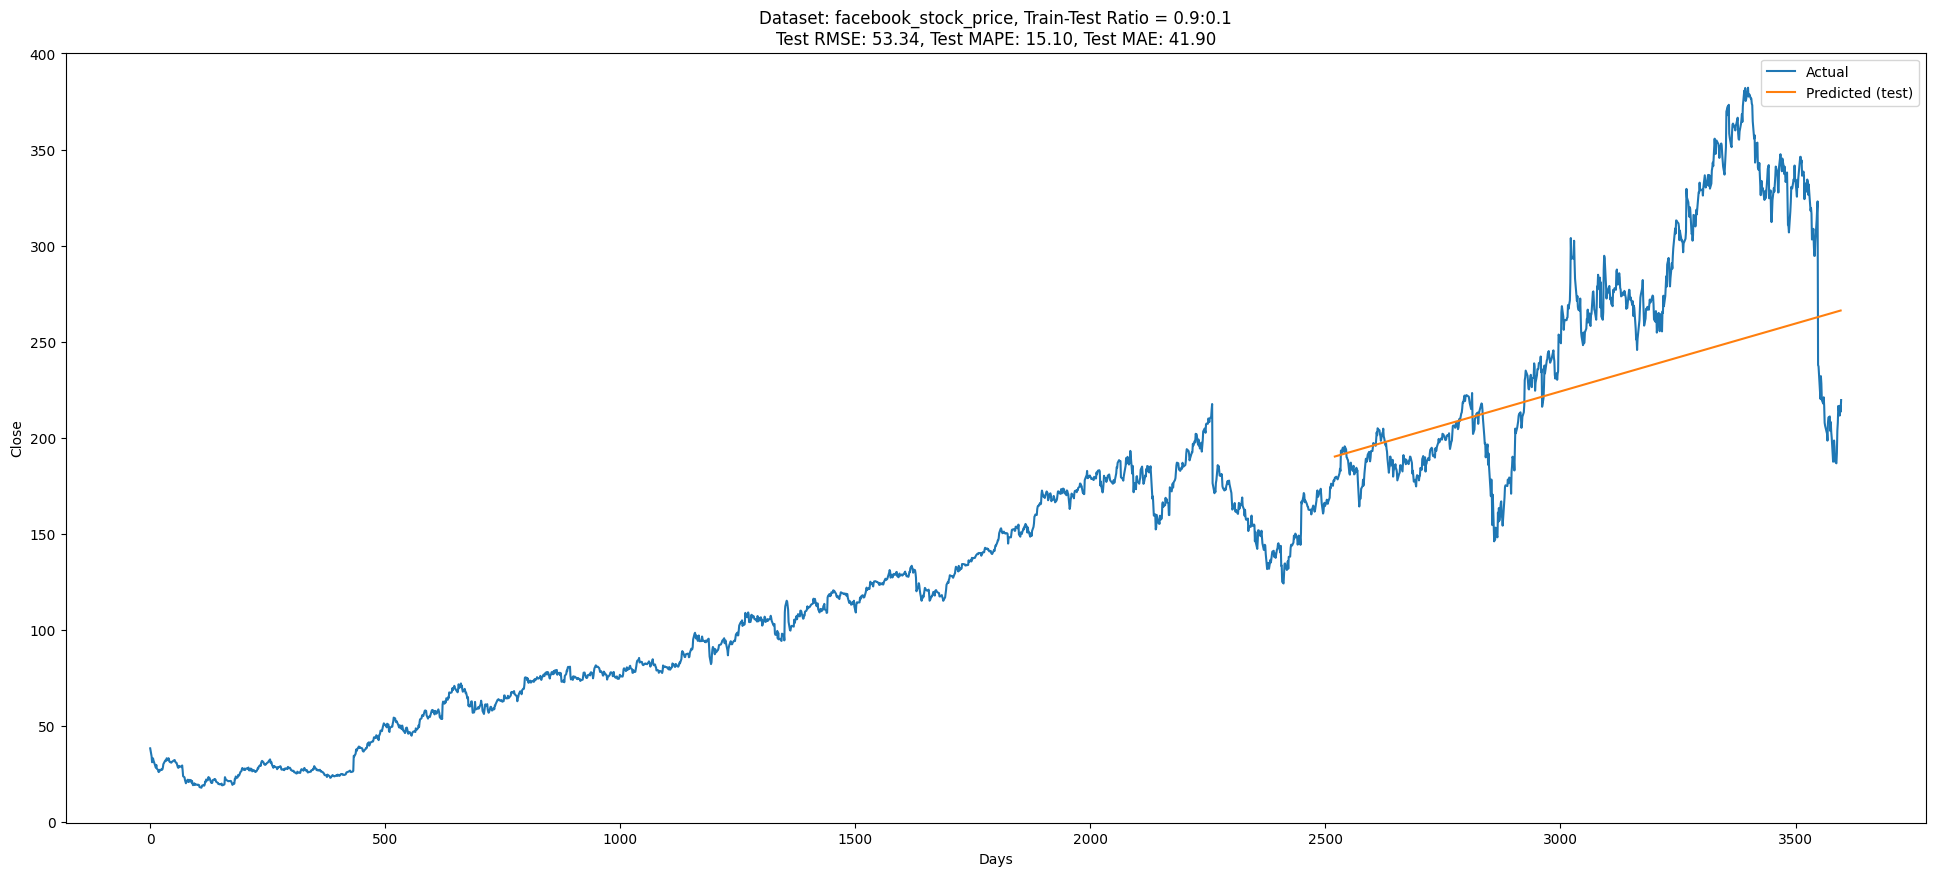



Dataset: tesla_stock_price, Train-Test Ratio = 0.7:0.3
Root Mean Squared Error (RMSE): 451.478
Mean Absolute Percentage Error (MAPE): 61.333
Mean Absolute Error (MAE): 312.027


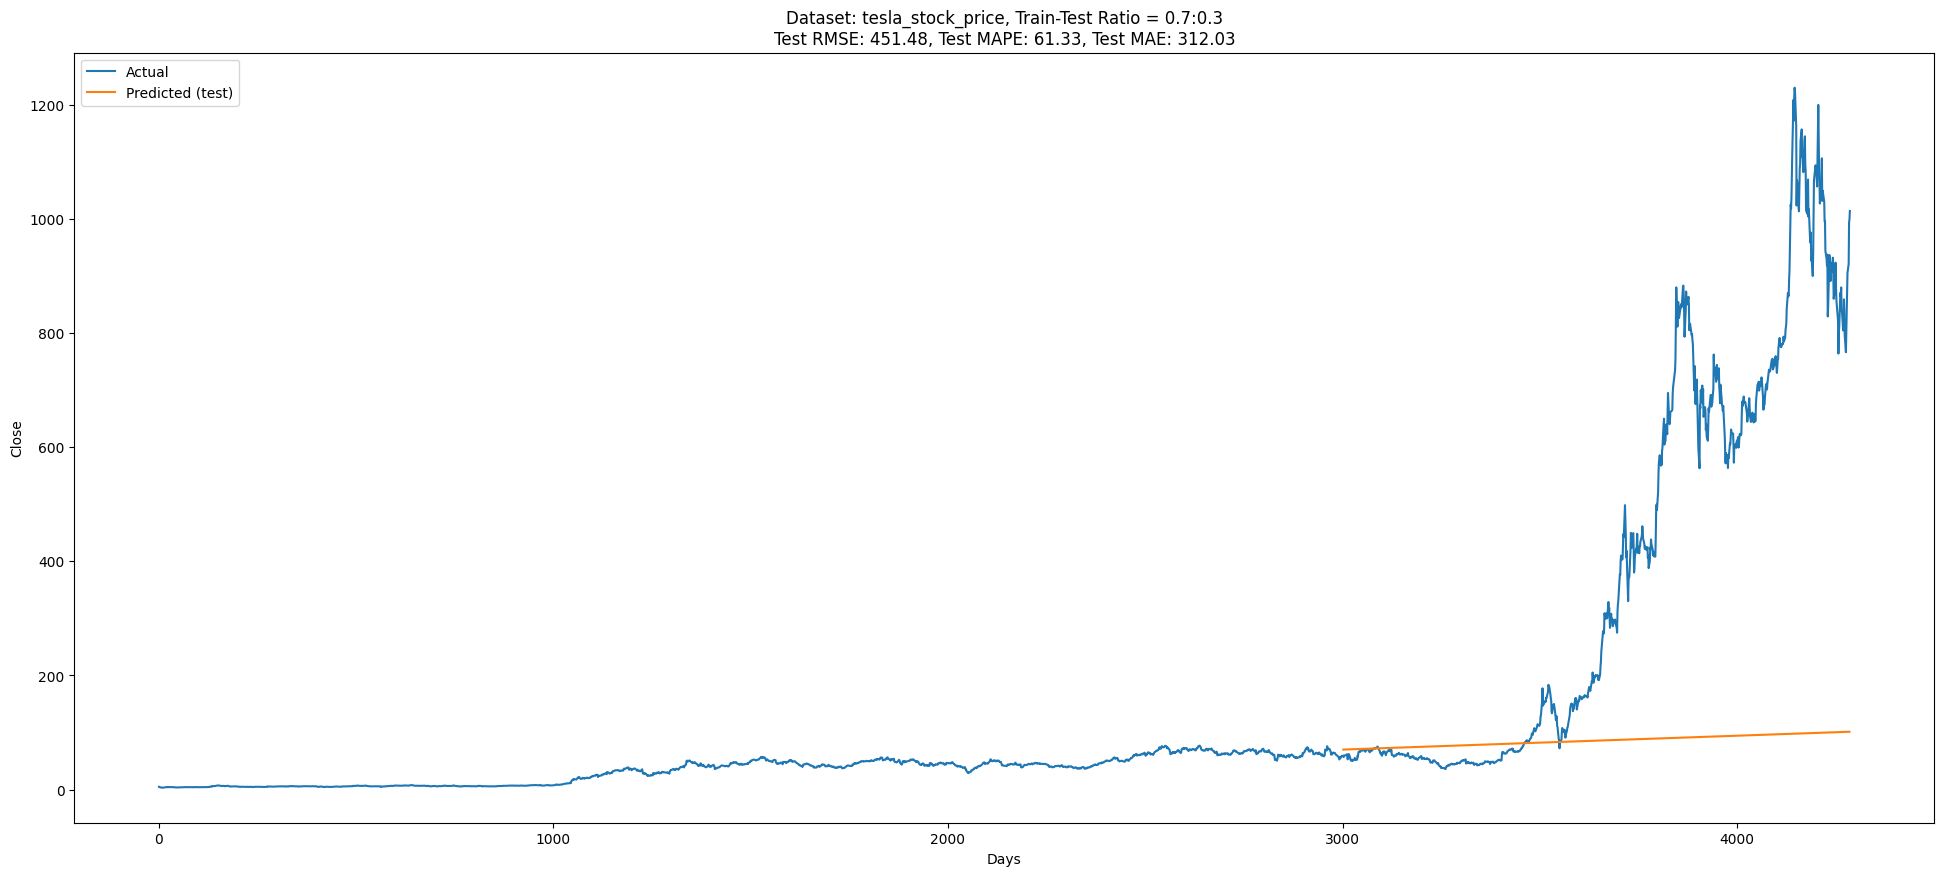



Dataset: tesla_stock_price, Train-Test Ratio = 0.8:0.2
Root Mean Squared Error (RMSE): 451.478
Mean Absolute Percentage Error (MAPE): 61.333
Mean Absolute Error (MAE): 312.027


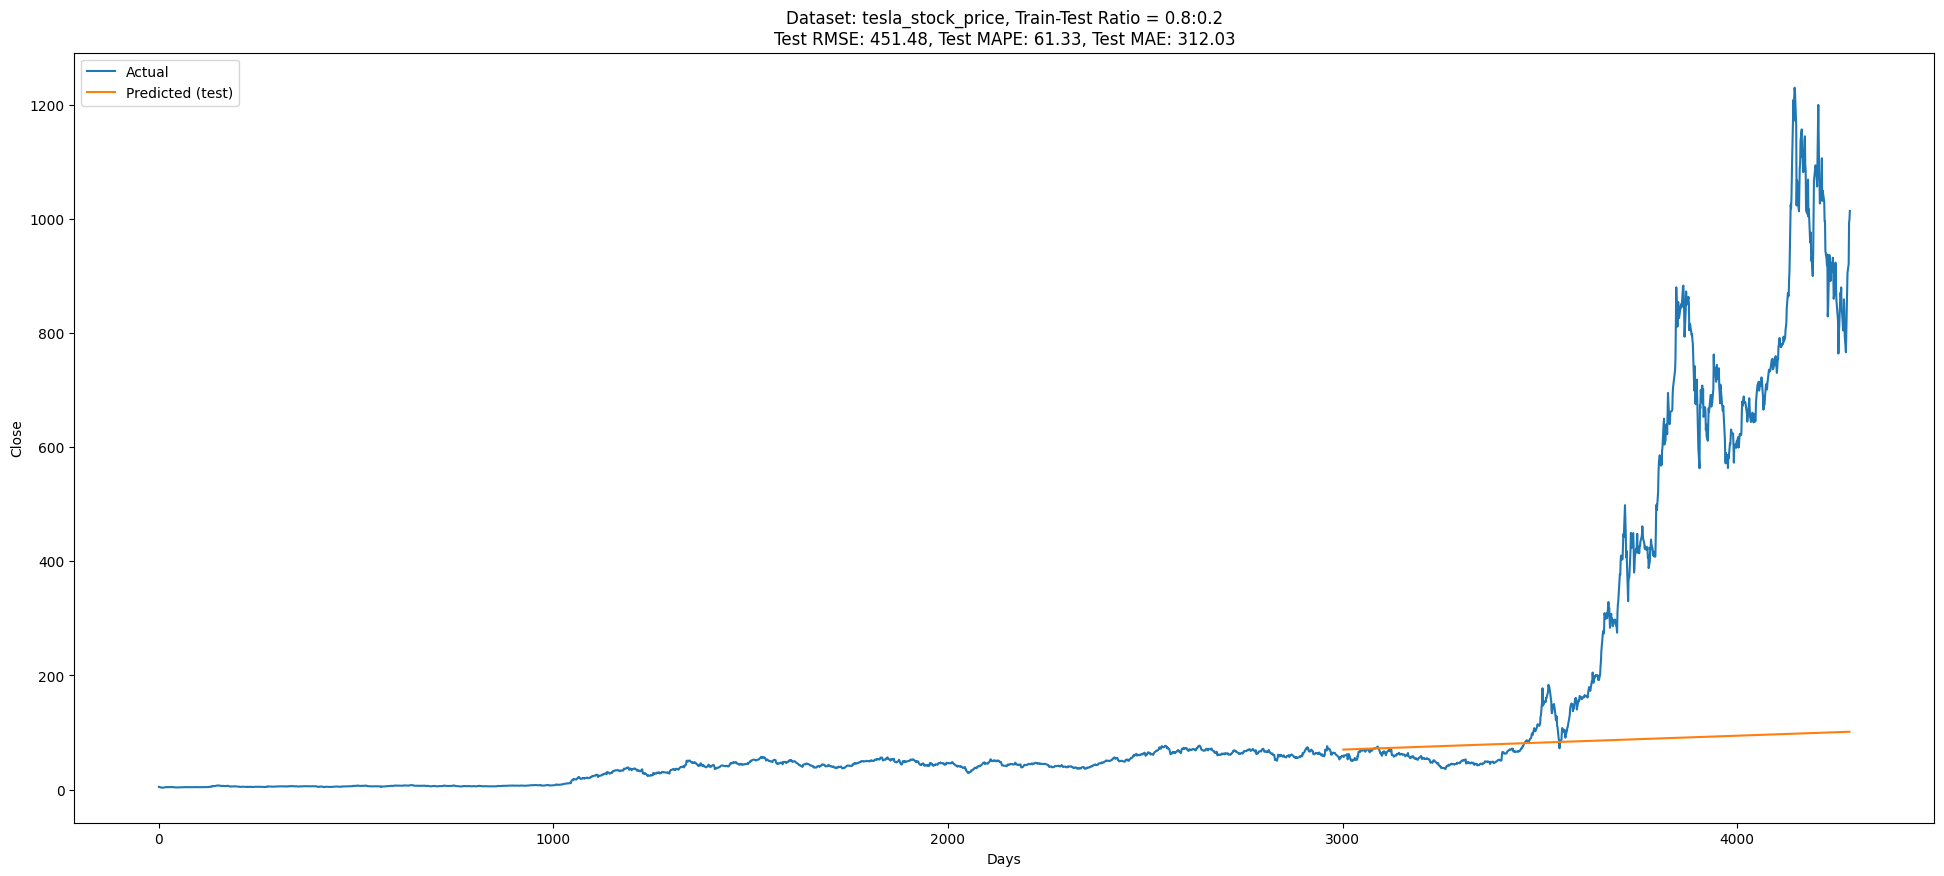



Dataset: tesla_stock_price, Train-Test Ratio = 0.9:0.1
Root Mean Squared Error (RMSE): 451.478
Mean Absolute Percentage Error (MAPE): 61.333
Mean Absolute Error (MAE): 312.027


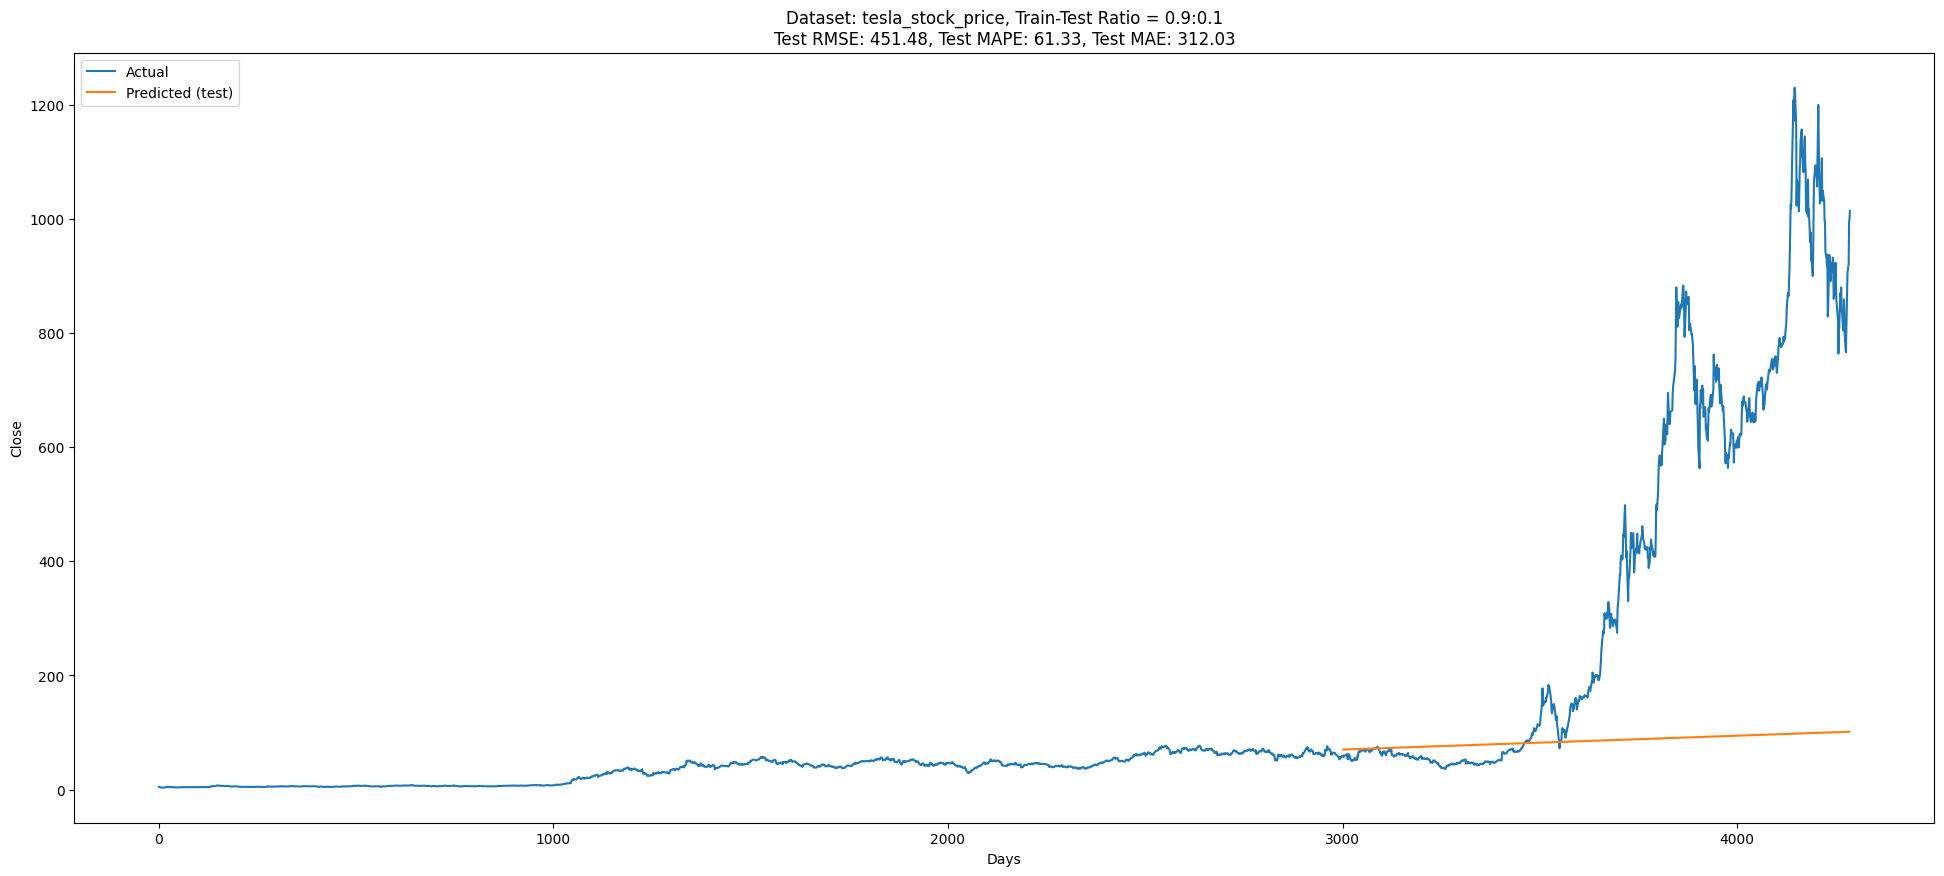

In [29]:
def train_test_model(dataset_url, train_ratio):

    # Load dataset, filter data from 2010 to 2022
    df = pd.read_csv(dataset_url, parse_dates=['Date'])
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter data from 2010 to 2022
    start_date = '2010-01-01'
    end_date = '2022-12-31'
    df = df.loc[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    # Extract the target variable and the features
    y = df['Close']
    x = (df['Date'] - df['Date'].iloc[0]).dt.days.to_frame()

    # Split the dataset into training, testing, and validation sets
    train_size = int(0.7 * len(df))
    test_size = int(0.3 * len(df))
    valid_size = len(df) - train_size - test_size
    x_train = x[:train_size]
    y_train = y[:train_size]
    x_test = x[train_size:train_size+test_size]
    y_test = y[train_size:train_size+test_size]
    x_valid = x[train_size+test_size:]
    y_valid = y[train_size+test_size:]

    # Fit a linear regression model on the training set
    reg = LinearRegression()
    reg.fit(x_train, y_train)

    # Print the title for the case
    print(f"Dataset: {dataset_url.split('/')[-1].split('.')[0]}, Train-Test Ratio = {train_ratio}:{round(1 - train_ratio, 1)}")

    # Evaluate the model's performance on the test set using MSE, MAE, and MAPE
    y_pred_test = reg.predict(x_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    test_rmse = np.sqrt(test_mse)
    print("Root Mean Squared Error (RMSE):",  round(test_rmse,3))
    print("Mean Absolute Percentage Error (MAPE):", round(test_mape,3))
    print("Mean Absolute Error (MAE):", round(test_mae,3))

    # Visualize the actual and predicted values for the training, testing, and validation sets

    fig, ax = plt.subplots(figsize=(24, 10))
    plt.title(f"Dataset: {dataset_url.split('/')[-1].split('.')[0]}, Train-Test Ratio = {train_ratio}:{round(1 - train_ratio, 1)}\n"
              f"Test RMSE: {test_rmse:.2f}, Test MAPE: {test_mape:.2f}, Test MAE: {test_mae:.2f}")

    plt.plot(x, y, label='Actual')
    plt.plot(x_test, y_pred_test, label='Predicted (test)')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Close')
    plt.show()


# Define the datasets
datasets = [
      'https://raw.githubusercontent.com/huy164/datasets/master/walmart_stock_price.csv',
      'https://raw.githubusercontent.com/huy164/datasets/master/facebook_stock_price.csv',
      'https://raw.githubusercontent.com/huy164/datasets/master/tesla_stock_price.csv'
]

# Define the train-test ratios
ratios = [0.7, 0.8, 0.9]

# Run the logic for each dataset with each ratio
for dataset_url in datasets:
    for ratio in ratios:
        train_test_model(dataset_url, ratio)
        print("\n")